# SVM Based Face Classifcation

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Getting the data

In [2]:
face_data= fetch_lfw_people(min_faces_per_person=80)

In [3]:
X=face_data.data
Y=face_data.target

In [4]:
print('Label names:', face_data.target_names)

Label names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


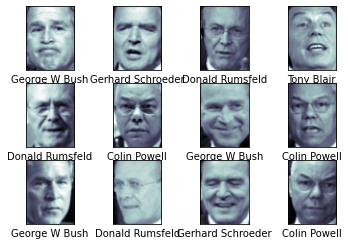

In [5]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
  axi.imshow(face_data.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[],
  xlabel=face_data.target_names[face_data.target[i]])

## SVM Classifier

In [6]:
clf = SVC(class_weight='balanced', random_state=42)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [8]:
 parameters = {'C': [0.1, 1, 10],'gamma': [1e-07, 1e-08, 1e-06],'kernel' : ['rbf', 'linear'] }

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
 grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

In [11]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1e-07, 1e-08, 1e-06],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
print('The best model:\n', grid_search.best_params_)

The best model:
 {'C': 10, 'gamma': 1e-07, 'kernel': 'rbf'}


In [13]:
 print('The best averaged performance:', grid_search.best_score_)

The best averaged performance: 0.8514619883040936


In [14]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test)

In [15]:
print(f'The accuracy is: {clf_best.score(X_test,Y_test)*100:.1f}%')

The accuracy is: 87.7%


In [17]:
from sklearn.metrics import classification_report

In [18]:
 print(classification_report(Y_test, pred,target_names=face_data.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.89      0.88      0.88        64
  Donald Rumsfeld       0.84      0.81      0.83        32
    George W Bush       0.88      0.93      0.90       127
Gerhard Schroeder       0.84      0.72      0.78        29
       Tony Blair       0.91      0.88      0.89        33

         accuracy                           0.88       285
        macro avg       0.87      0.84      0.86       285
     weighted avg       0.88      0.88      0.88       285



## Boosting performance using PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC(class_weight='balanced', kernel='rbf',random_state=42)
from sklearn.pipeline import Pipeline
model = Pipeline([('pca', pca),('svc', svc)])

In [22]:
parameters_pipeline = {'svc__C': [1, 3, 10],'svc__gamma': [0.001, 0.005]}
grid_search = GridSearchCV(model, parameters_pipeline)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=100, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=42,
                              

In [23]:
print('The best model:\n', grid_search.best_params_)

The best model:
 {'svc__C': 1, 'svc__gamma': 0.005}


In [24]:
print('The best averaged performance:', grid_search.best_score_)
model_best = grid_search.best_estimator_
print(f'The accuracy is: {model_best.score(X_test, Y_test)*100:.1f}%')
pred = model_best.predict(X_test)
print(classification_report(Y_test, pred, target_names=face_data.target_names))

The best averaged performance: 0.8654970760233918
The accuracy is: 90.2%
                   precision    recall  f1-score   support

     Colin Powell       0.91      0.95      0.93        64
  Donald Rumsfeld       0.77      0.84      0.81        32
    George W Bush       0.95      0.91      0.93       127
Gerhard Schroeder       0.81      0.86      0.83        29
       Tony Blair       0.93      0.85      0.89        33

         accuracy                           0.90       285
        macro avg       0.87      0.88      0.88       285
     weighted avg       0.90      0.90      0.90       285

